<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science - Series temporales: Introducción al análisis de series temporales
El objetivo de este proyecto es analizar patrones en series temporales.

En este estudio no se pretende implementar ningun modelo de machine learnig pero si hacer uso de algunas técnicas del preprocesamiento de datos.



### **Del proyecto:** 231107-1_data_science_analisis _series_temporales

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Descomposicion de la serie
    - Descomposicion de primer orden
    - Descomposición de segundo orden
7. Autocorrelación
8. Tendencia( Trend)
9. Componente estacional (Seasonality)
10. Componente estacionario (Stationary)
11. Componente aleatorio (Residual)


### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install -r "/content/drive/MyDrive/Colab Notebooks/231103-1_machine_learning_clustering_extrayendo_patrones_datos/requirements.txt"

In [3]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**





In [4]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [5]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
ventas_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231107-1_data_science_analisis _series_temporales/datasets/ventas.csv'
ventas_df = pd.read_csv(ventas_data_file_path, sep=';')

### **4. Consultar información sobre las variables del Dataframe**

In [6]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     36 non-null     object 
 1   Ventas  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


Para un analisis de una serie temporal se requiere que la variable fecha sea de tipo datetime

In [7]:
ventas_df.head(5)

,Mes,Ventas
0,01-jan-2017,266.0
1,01-feb-2017,145.9
2,01-mar-2017,183.1
3,01-apr-2017,119.3
4,01-may-2017,180.3


### **5. Preprocesamiento**

**Transformación:** Cambiamos el tipo de dato de la variable fecha de cadena de caracteres a datetime

In [8]:
ventas_df['Mes']= pd.to_datetime(ventas_df['Mes'])
ventas_df.head(5)

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [9]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     36 non-null     datetime64[ns]
 1   Ventas  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


<Axes: xlabel='Mes', ylabel='Ventas'>

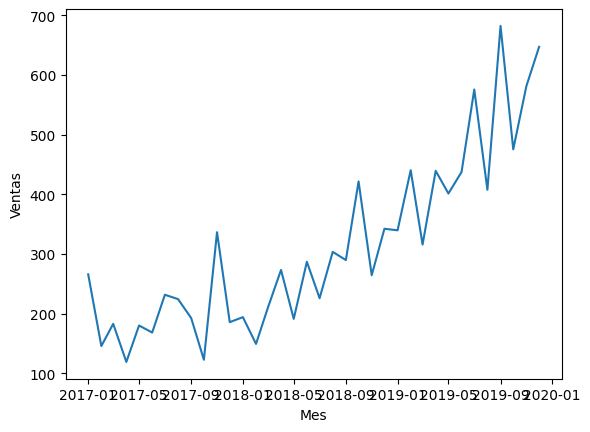

In [10]:
#Trazamos un gráfico de lineas
sns.lineplot(x='Mes', y='Ventas', data=ventas_df)

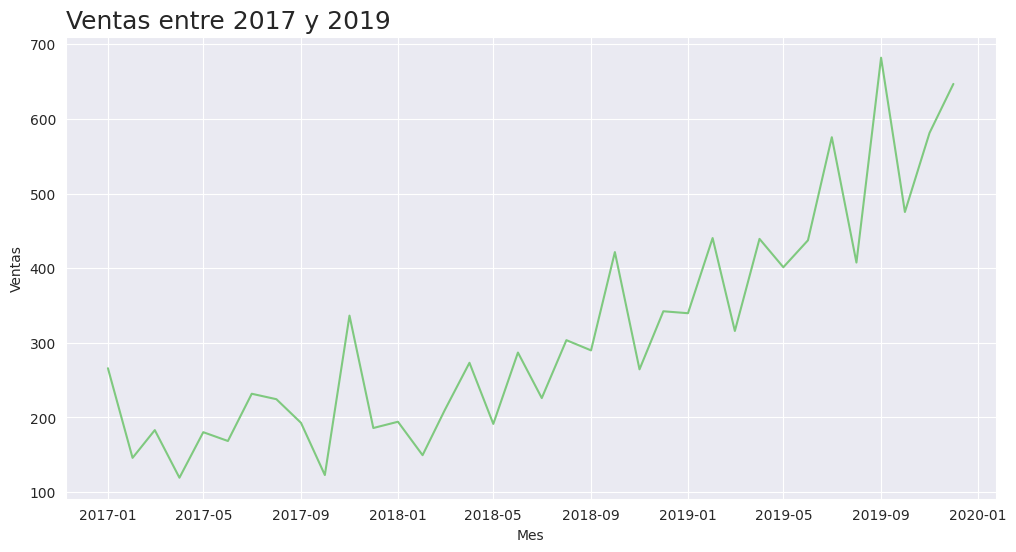

In [11]:
from matplotlib import figure
#Personalizemos el grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax=sns.lineplot(x='Mes', y='Ventas', data=ventas_df)
ax.figure.set_size_inches(12,6)
ax.set_title('Ventas entre 2017 y 2019', loc='left', fontsize=18)
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
ax=ax #Para que no aparezca el mensaje de ejecución

In [12]:
# Como vamos a usar frecuentemente este bloque de instruccione para trazar un gráfico de línea creamos una función que podamos llamar y ejecuta
def grafico(titulo,eje_x, eje_y, etiqueta_x, etiqueta_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax=sns.lineplot(x=eje_x, y=eje_y, data=ventas_df)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax=ax #Para que no aparezca el mensaje de ejecución


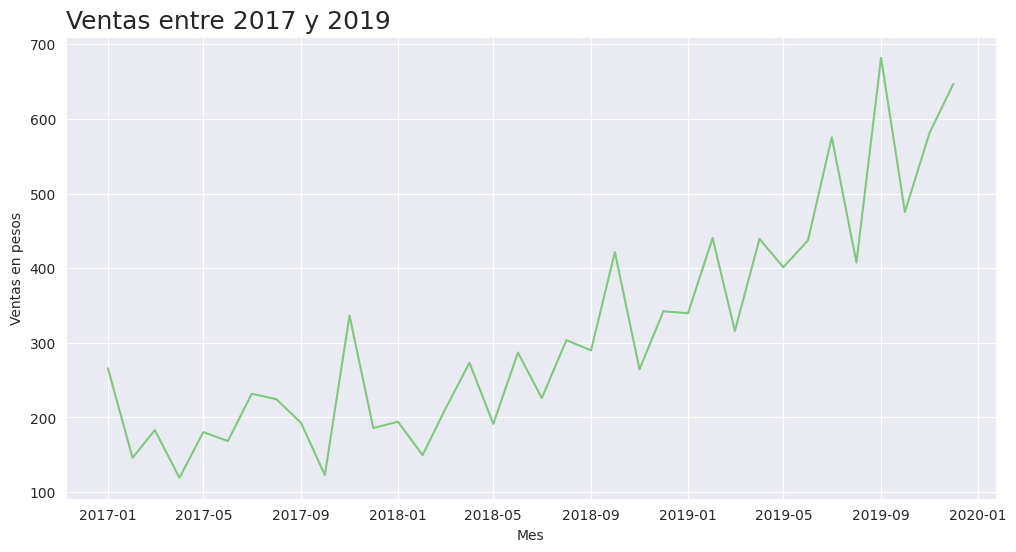

In [13]:
grafico('Ventas entre 2017 y 2019','Mes','Ventas','Mes','Ventas en pesos')

### **6. Descomposición de la serie temporal**

**Descomposición de primer orden:**

In [14]:
ventas_df['Variacion']= ventas_df['Ventas'].diff()
ventas_df.head(5)

,Mes,Ventas,Variacion
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,-120.1
2,2017-03-01,183.1,37.2
3,2017-04-01,119.3,-63.8
4,2017-05-01,180.3,61.0


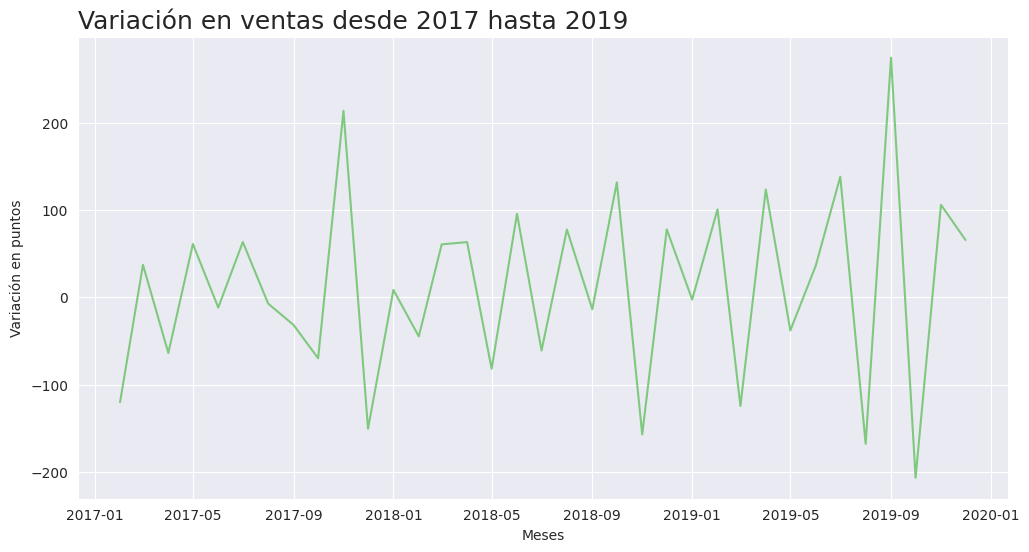

In [15]:
grafico('Variación en ventas desde 2017 hasta 2019', 'Mes', 'Variacion','Meses', 'Variación en puntos')

**Descomposición de segundo orden:**

In [16]:
ventas_df['Aceleracion']= ventas_df['Variacion'].diff()
ventas_df.head(5)

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


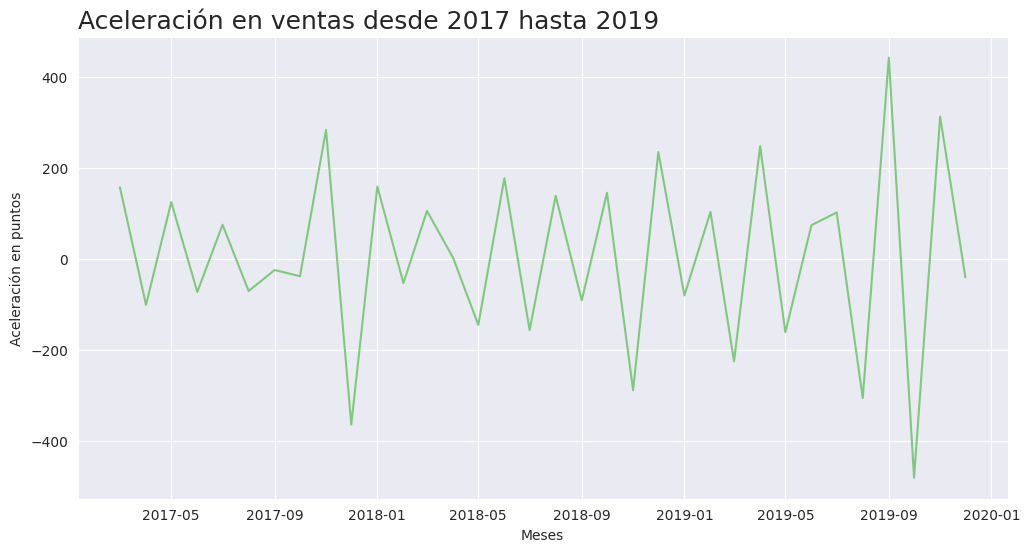

In [17]:
grafico('Aceleración en ventas desde 2017 hasta 2019', 'Mes', 'Aceleracion','Meses', 'Aceleración en puntos')

In [18]:
import matplotlib.pyplot as plt
def comparar_graficos(titulo,dataset,x,y1,y2,y3):
  plt.figure(figsize=(14,10))
  ax=plt.subplot(3,1,1)
  ax.set_title(titulo, loc='left', fontsize=18)
  sns.lineplot(x=x,y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3, data=dataset)
  ax=ax


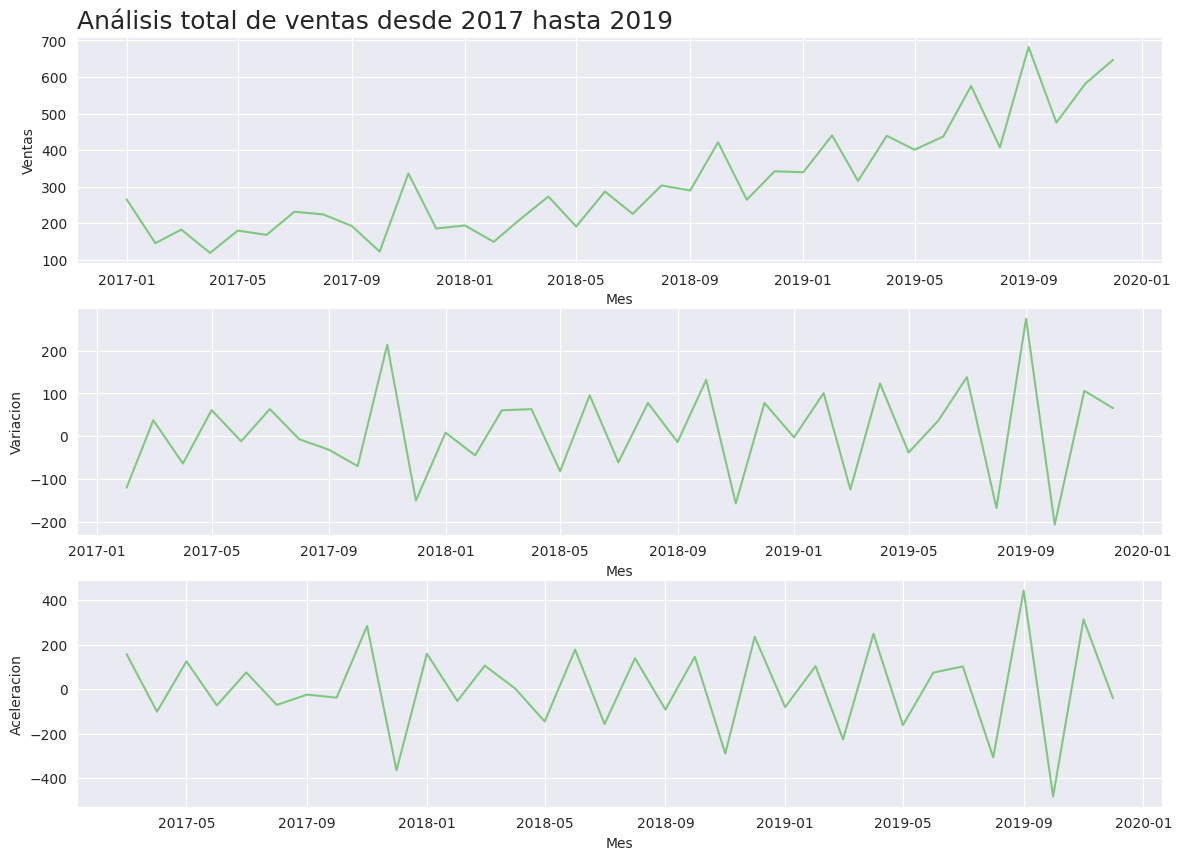

In [19]:
comparar_graficos('Análisis total de ventas desde 2017 hasta 2019',ventas_df, 'Mes', 'Ventas','Variacion', 'Aceleracion')

### **7. Autocorrelación**

¿Qué es la autocorrelación? Es un indicador que mide la relación existente entre diferentes intervalos de una serie temporal. Otra forma de entender la autocorrelación es: la correlación existente con una versión desplazada de la propia serie temporal.

Al igual que la correlación, la autocorrelación se ubica entre -1 y 1.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

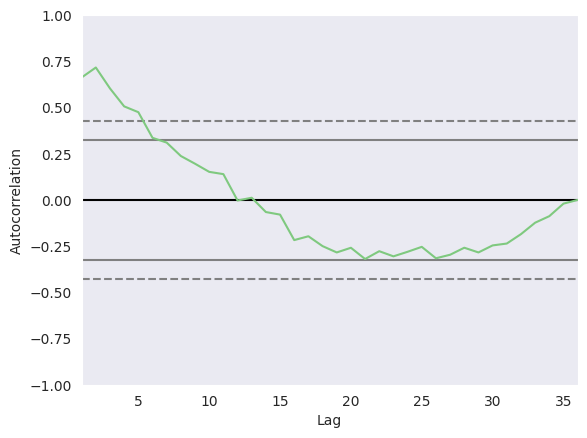

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ventas_df['Ventas'])

Con el valor 1 decimos que tenemos una autocorrelación perfecta positiva y con el valor de -1 decimos que tenemos una autocorrelación perfecta negativa. Con una autocorrelación de 0 no tenemos ningún tipo de autocorrelación en la variable.

### **8. Tendencia**

**Tendencia (Trend).**
Es el comportamiento o movimiento que se produce a largo plazo en relación a la media. La tendencia se identifica con un movimiento suave de la serie a largo plazo.

**Componente estacional o cíclico (seasonality).**
Refleja comportamientos recurrentes en periodos específicos de tiempo dentro de la serie temporal.

**Componente estacionário (stationary).**
Son series temporales que en un principio no tienen los componentes de tendencia ni el componente estacional.

Las series estacionarias tienen una media y varianza constantes a lo largo del tiempo.

**Componente aleatório (residual)**.
Son alteraciones de la serie sin una pauta periódica ni tendencia claras. No suele tener incidencia en el resultado de la serie y se considera que está ocasionado por varios factores de pequeña entidad.

**Componente estacional o cíclico**

Es el componente de una serie que recoge las oscilaciones periódicas dentro de un periodo de tiempo específico.



**Grupos**

In [21]:
ventas_df.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


La función Grouper nos es muy útil cuando estamos analizando series temporales ya que nos permite agrupar variables y dejarlas con la periodicidad que nos pueda parecer más conveniente.

In [22]:
# Creamos grupos de datos por trimestres
agrup_ventas_df= ventas_df[['Mes','Ventas']].groupby(pd.Grouper(key='Mes',freq='Q')).sum()
agrup_ventas_df

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9
2018-06-30,751.7
2018-09-30,819.5
2018-12-31,1028.4
2019-03-31,1096.0


In [23]:
# Creamos grupos de datos por año
agrup_ventas_df= ventas_df[['Mes','Ventas']].groupby(pd.Grouper(key='Mes',freq='Q')).sum()
agrup_ventas_df

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9
2018-06-30,751.7
2018-09-30,819.5
2018-12-31,1028.4
2019-03-31,1096.0


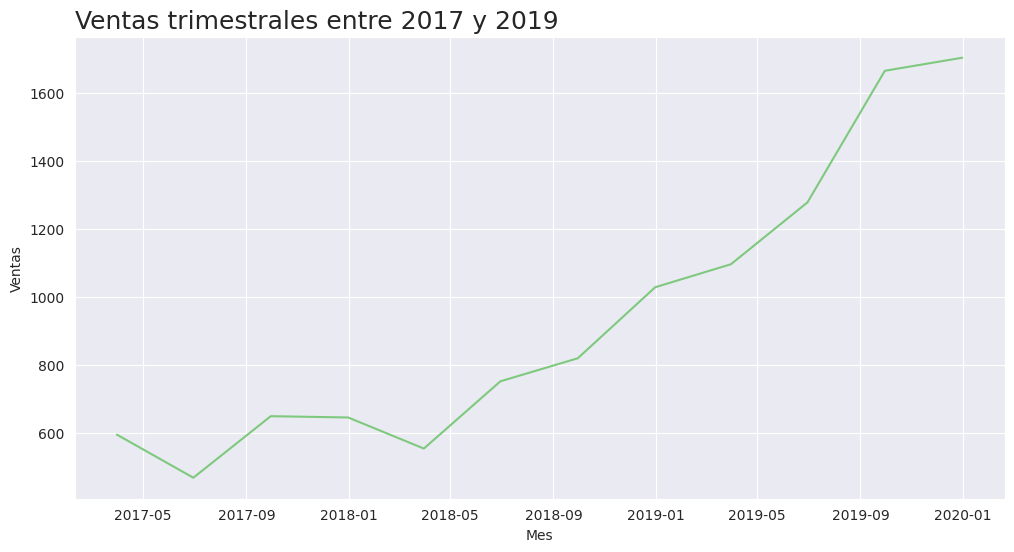

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax=sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas_df)
ax.figure.set_size_inches(12,6)
ax.set_title('Ventas trimestrales entre 2017 y 2019', loc='left', fontsize=18)
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
ax=ax #Para que no aparezca el mensaje de ejecución

### **9. Componente estacional**

En esta sección trabajamos con dataset diferente, en esta base está el número de visitas que un determinado número de personas hace a la playa a lo largo del tiempo.

In [25]:
visitas_playas_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231107-1_data_science_analisis _series_temporales/datasets/analisis_visitas_playa.csv'
playas_df = pd.read_csv(visitas_playas_data_file_path, sep=';')

In [26]:
playas_df.head(5)

,Mes,visitas
0,01/jan/04,78
1,01-feb-2004,72
2,01/mar/04,76
3,01-apr-2004,75
4,01-may-2004,80


In [27]:
playas_df['Mes']= pd.to_datetime(playas_df['Mes'])
playas_df.head(5)

,Mes,visitas
0,2004-01-01,78
1,2004-02-01,72
2,2004-03-01,76
3,2004-04-01,75
4,2004-05-01,80


In [28]:
playas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Mes      192 non-null    datetime64[ns]
 1   visitas  192 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [29]:
def grafico2(titulo,x, y, etiqueta_x, etiqueta_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax=sns.lineplot(x=x, y=y, data=playas_df)
    ax.figure.set_size_inches(14,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax=ax #Para que no aparezca el mensaje de ejecución

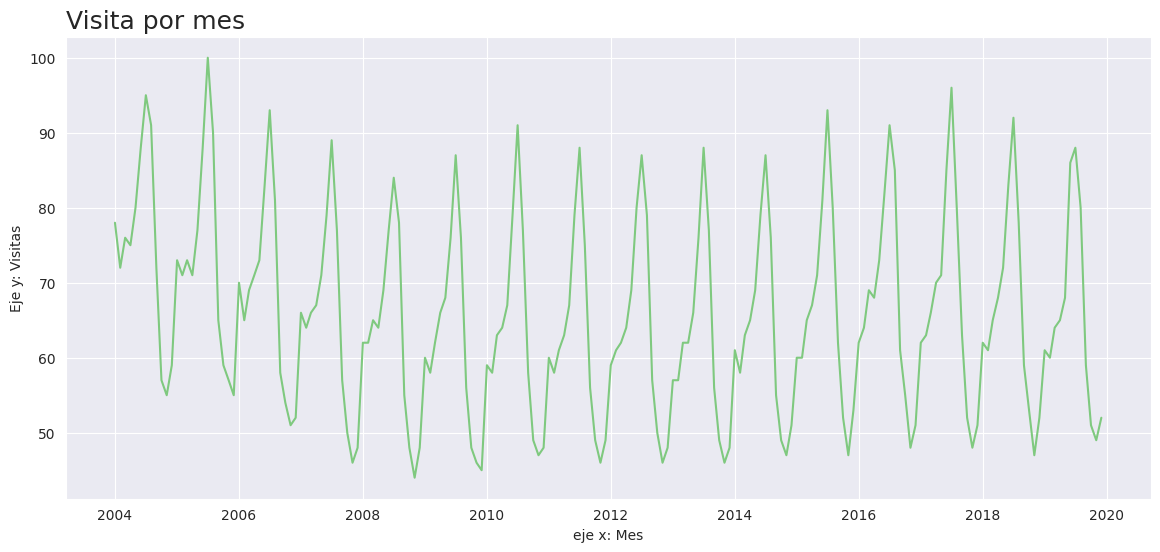

In [30]:
grafico2('Visita por mes','Mes', 'visitas', 'eje x: Mes', 'Eje y: Visitas')

**Descomposición de primer y segundo orden:**

In [31]:
playas_df['Variacion']= playas_df['visitas'].diff()
playas_df['Aceleracion']= playas_df['Variacion'].diff()
playas_df.head(5)

,Mes,visitas,Variacion,Aceleracion
0,2004-01-01,78,NaN,NaN
1,2004-02-01,72,-6.0,NaN
2,2004-03-01,76,4.0,10.0
3,2004-04-01,75,-1.0,-5.0
4,2004-05-01,80,5.0,6.0


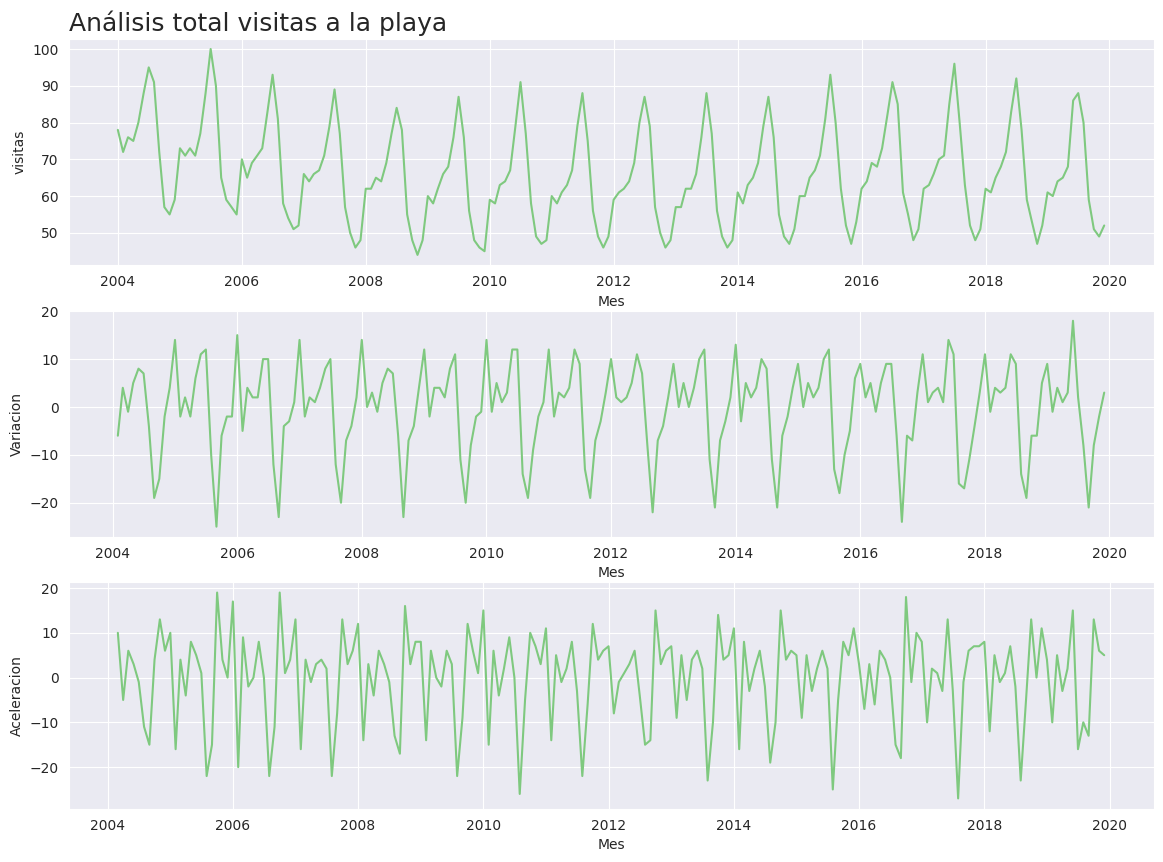

In [32]:
comparar_graficos('Análisis total visitas a la playa',playas_df, 'Mes', 'visitas','Variacion', 'Aceleracion')

**Statsmodels:**

In [33]:
[playas_df['visitas']]

[0      78
 1      72
 2      76
 3      75
 4      80
        ..
 187    80
 188    59
 189    51
 190    49
 191    52
 Name: visitas, Length: 192, dtype: int64]

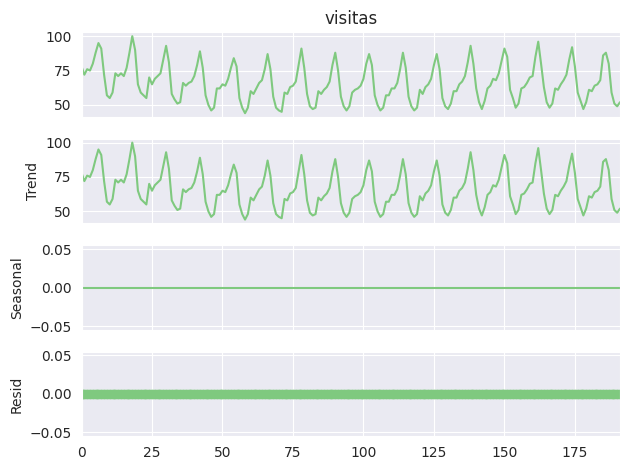

In [34]:
#Periodo mensual
from statsmodels.tsa.seasonal import seasonal_decompose
#el parametro period=1 corresponde a una perioricidad mensual
resultado = seasonal_decompose(playas_df['visitas'], period=1)
ax =resultado.plot()

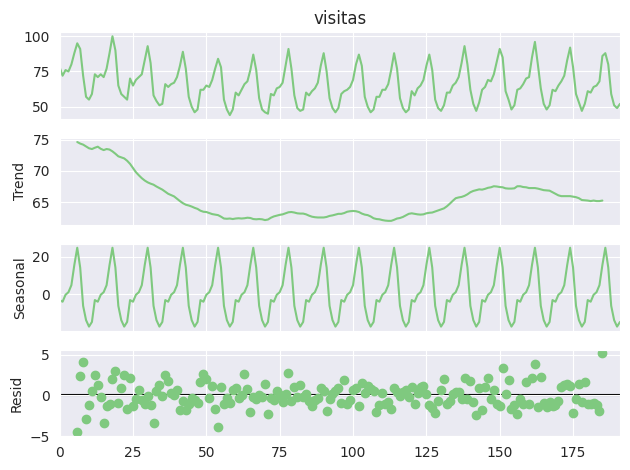

In [35]:
#Periodo aual
from statsmodels.tsa.seasonal import seasonal_decompose
#el parametro period=1 corresponde a una perioricidad anual
resultado = seasonal_decompose(playas_df['visitas'], period=12)
ax =resultado.plot()

In [37]:
observadas= resultado.observed
tendencia= resultado.trend
estacionalidad= resultado.seasonal
residuo= resultado.resid

In [38]:
resultados_di =({
    'observadas':observadas,
    'tendencia':tendencia,
    'estacionalidad':estacionalidad,
    'residuo':residuo,
})

In [39]:
decompose_df =pd.DataFrame(resultados_di)
decompose_df.head(12)

,observadas,tendencia,estacionalidad,residuo
0,78.0,NaN,-3.227083,NaN
1,72.0,NaN,-4.110417,NaN
2,76.0,NaN,-0.377083,NaN
3,75.0,NaN,1.009028,NaN
4,80.0,NaN,4.775694,NaN
5,88.0,NaN,15.611806,NaN
6,95.0,74.625000,24.906250,-4.531250
7,91.0,74.375000,14.253472,2.371528
8,72.0,74.208333,-6.346528,4.138194
9,57.0,73.916667,-14.018750,-2.897917


### **10. otros**